<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Fuzzy_System/credit_approval_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fuzzy_expert

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference


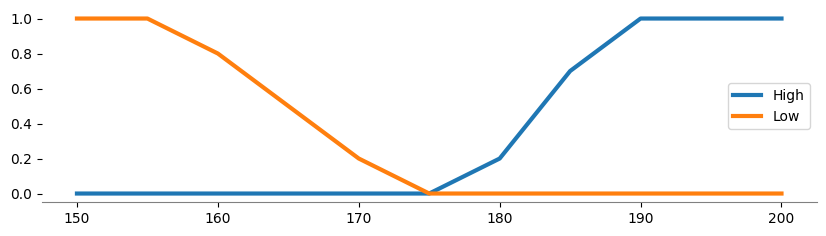

In [3]:
variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
variables["score"].plot()

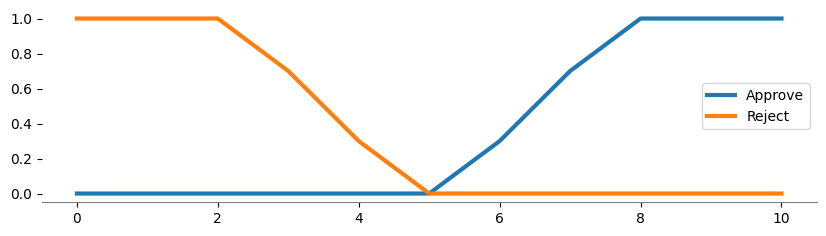

In [4]:
plt.figure(figsize=(10, 2.5))
variables["decision"].plot()

In [5]:
rules = [
    FuzzyRule(
        premise=[
            ("score", "High"),
            ("AND", "ratio", "Goodr"),
            ("AND", "credit", "Goodc"),
        ],
        consequence=[("decision", "Approve")],
    ),
    FuzzyRule(
        premise=[
            ("score", "Low"),
            ("AND", "ratio", "Badr"),
            ("OR", "credit", "Badc"),
        ],
        consequence=[("decision", "Reject")],
    )
]

print(rules[0])
print()
print(rules[1])

IF  score IS High
    AND ratio IS Goodr
    AND credit IS Goodc
THEN
    decision IS Approve
CF = 1.00
Threshold-CF = 0.00


IF  score IS Low
    AND ratio IS Badr
    OR credit IS Badc
THEN
    decision IS Reject
CF = 1.00
Threshold-CF = 0.00



In [6]:
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    score=190,
    ratio=0.39,
    credit=1.5,
)

({'decision': 8.010492631084489}, 1.0)

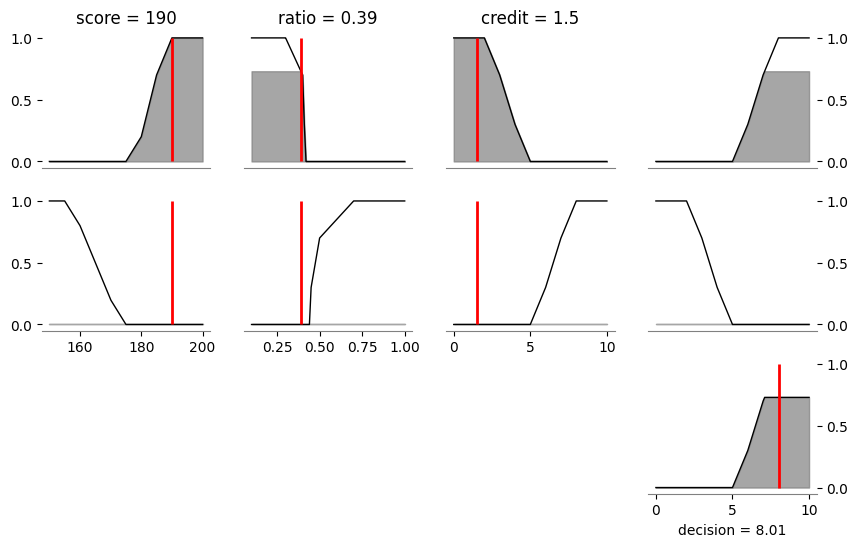

In [7]:
plt.figure(figsize=(10, 6))
model.plot(
    variables=variables,
    rules=rules,
    score=190,
    ratio=0.39,
    credit=1.5,
)